In [380]:
%matplotlib ipympl

from onix.data_tools import get_experiment_data
from onix.sequences.sequence import AWGSineSweep
from functools import partial
from onix.analysis.fitter import Fitter
from onix.analysis.helper import data_groups
import numpy as np
from matplotlib import colormaps
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from numpy.fft import fft, ifft


In [179]:
def gaussian(f, f_0, a, sigma, b, c):
    return -a * np.exp((- (f - f_0) ** 2) / (2 * sigma ** 2)) + c + b * (f - f_0)

def get_gaussian_fit(detunings, voltages, p0=None):
    fitter = Fitter(gaussian)
    fitter.set_absolute_sigma(False)
    fitter.set_data(detunings, voltages)
    fitter.set_p0({"f_0": 0, "a" : 1, "sigma" : 0.1})
    # fitter.set_bounds({"a": [-1000, 0]})
    fitter.fit()
    return fitter

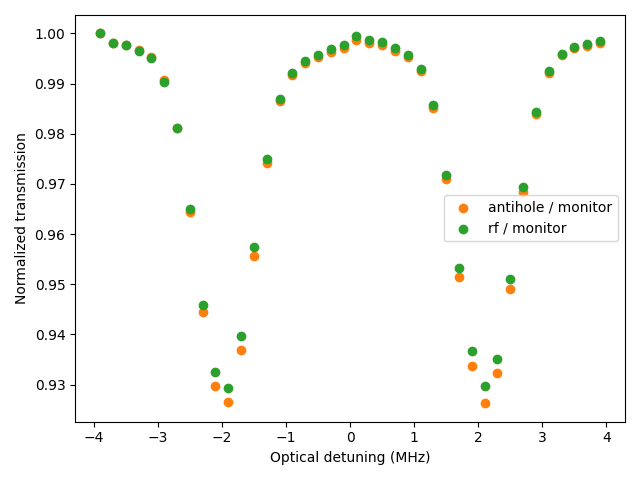

-0.13906447247311707
0.4576453976705713


In [423]:
# data, headers = get_experiment_data(32892+50)
data, headers = get_experiment_data(28096+50)
data, headers = get_experiment_data(36900)

(chasm_avg, antihole_avg, rf_avg), (monitor_chasm_avg, monitor_antihole_avg, monitor_rf_avg) = data_groups(data, headers)
detunings_MHz = headers["detunings"].to("MHz").magnitude


antihole_to_monitor = antihole_avg/monitor_antihole_avg
rf_to_monitor = rf_avg/monitor_rf_avg

xaxis = np.linspace(min(detunings_MHz), max(detunings_MHz), 1000)

fig, ax = plt.subplots()
ax.scatter(detunings_MHz, antihole_to_monitor / max(antihole_to_monitor), label="antihole / monitor", color="C1")
antihole_fit = get_gaussian_fit(detunings_MHz, antihole_to_monitor / max(antihole_to_monitor))
# ax.plot(xaxis, antihole_fit.fitted_value(xaxis), label = "antihole fit", color="C1")

if "rf_repeats" in headers["params"]["detect"]:
    ax.scatter(detunings_MHz, rf_to_monitor / max(rf_to_monitor), label="rf / monitor", color="C2")
    rf_fit = get_gaussian_fit(detunings_MHz, rf_to_monitor / max(rf_to_monitor))
    # ax.plot(xaxis, rf_fit.fitted_value(xaxis), label = "rf fit", color="C2")
    pass
            
# ax.scatter(detunings_MHz, chasm_avg, label="chasm")

ax.set_xlabel("Optical detuning (MHz)")
ax.set_ylabel("Normalized transmission")
plt.legend()
plt.tight_layout()
plt.show()

print(antihole_fit.results["a"])
print(rf_fit.results["a"])

<h2>Chasm duration</h2>

/home/icarus/.venv/vlab/lib/python3.12/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/icarus/.venv/vlab/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


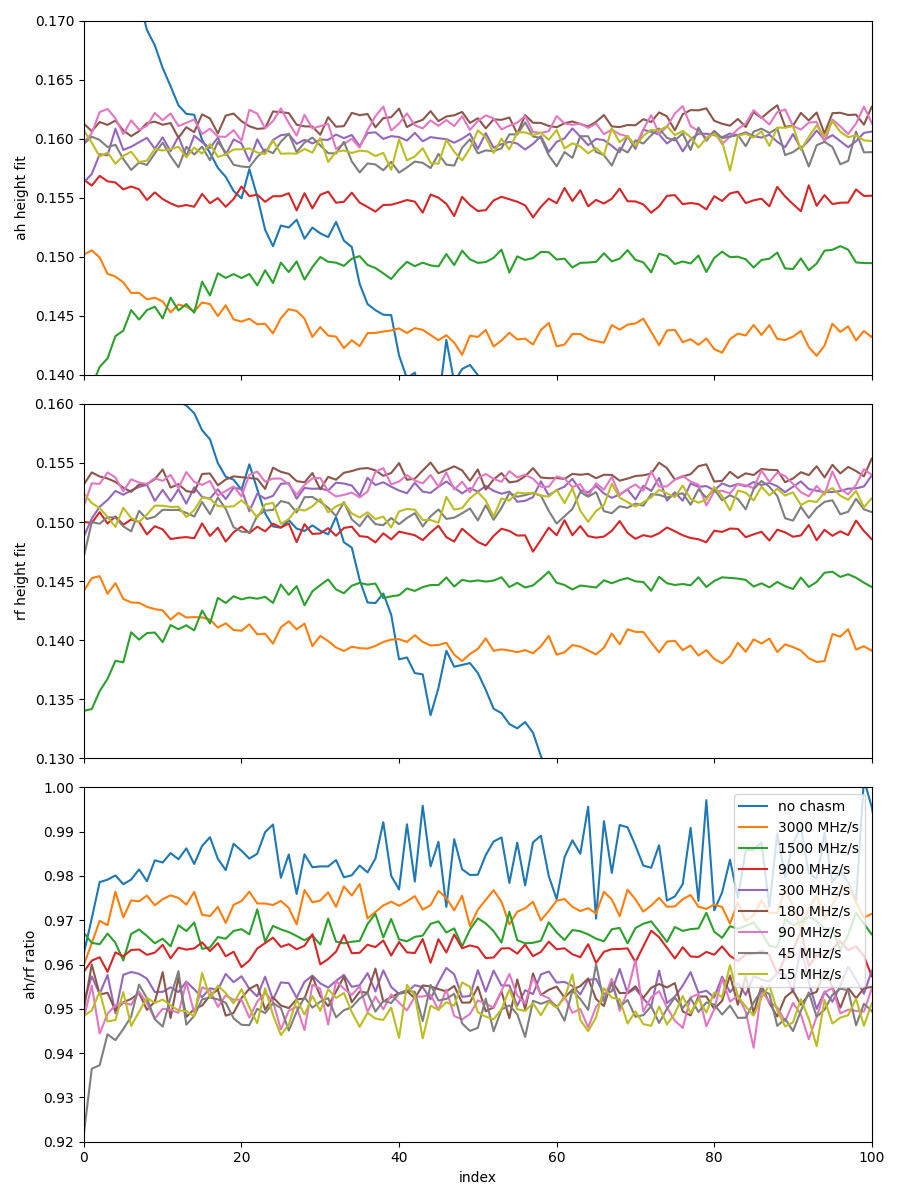

In [390]:
data_all = {
    "no chasm" : [27482, 27914],
    "3000 MHz/s": [29112, 29284],
    "1500 MHz/s": [29337, 29592],
    "900 MHz/s": [28880, 29111],
    "300 MHz/s": [28609, 28879], 
    "180 MHz/s": [28381, 28608],
    "90 MHz/s": [28250, 28380],
    "45 MHz/s": [27915, 28095],
    "15 MHz/s": [28096, 28249],
}

fig, axs = plt.subplots(3, 1, figsize = (9, 12), sharex = True)

for label, data_range in data_all.items():

    data_numbers = range(data_range[0], data_range[1]+1)
    
    ah_amplitudes = []
    rf_amplitudes = []
    ratio_amplitudes = []
    
    for data_number in data_numbers:
        data, headers = get_experiment_data(data_number)
        (chasm_avg, antihole_avg, rf_avg), (monitor_chasm_avg, monitor_antihole_avg, monitor_rf_avg) = data_groups(data, headers)
        detunings_MHz = headers["detunings"].to("MHz").magnitude
        antihole_to_monitor = antihole_avg/monitor_antihole_avg
        rf_to_monitor = rf_avg/monitor_rf_avg
        
        antihole_fit = get_gaussian_fit(detunings_MHz, antihole_to_monitor / max(antihole_to_monitor))
        rf_fit = get_gaussian_fit(detunings_MHz, rf_to_monitor / max(rf_to_monitor))\
        
        ah_amplitudes.append(antihole_fit.results["a"])
        rf_amplitudes.append(rf_fit.results["a"])
        ratio_amplitudes.append(rf_fit.results["a"] / antihole_fit.results["a"])
    
    axs[0].plot(ah_amplitudes, label = label)
    axs[1].plot(rf_amplitudes, label = label)
    axs[2].plot(ratio_amplitudes, label = label)

axs[0].set_xlim([0, 100])
axs[0].set_ylim([0.14, 0.17])
axs[1].set_ylim([0.13, 0.16])
axs[2].set_ylim([0.92, 1])
axs[0].set_ylabel("ah height fit")
axs[1].set_ylabel("rf height fit")
axs[2].set_ylabel("ah/rf ratio")
axs[2].set_xlabel("index")
ax.set_xlabel("index")
plt.legend()
plt.tight_layout()
plt.show()

<h2>Antihole duration</h2>

rect pulse (0.01 s)
rect pulse (0.02 s)
rect pulse (0.05 s)
rect pulse (0.1 s)
rect pulse (0.2 s)
rect pulse (0.4 s)
rect pulse (0.5 s)
sech pulse (0.01 s)
sech pulse (0.02 s)
sech pulse (0.05 s)
sech pulse (0.1 s)
sech pulse (0.2 s)
sech pulse (0.4 s)
sech pulse (0.5 s)


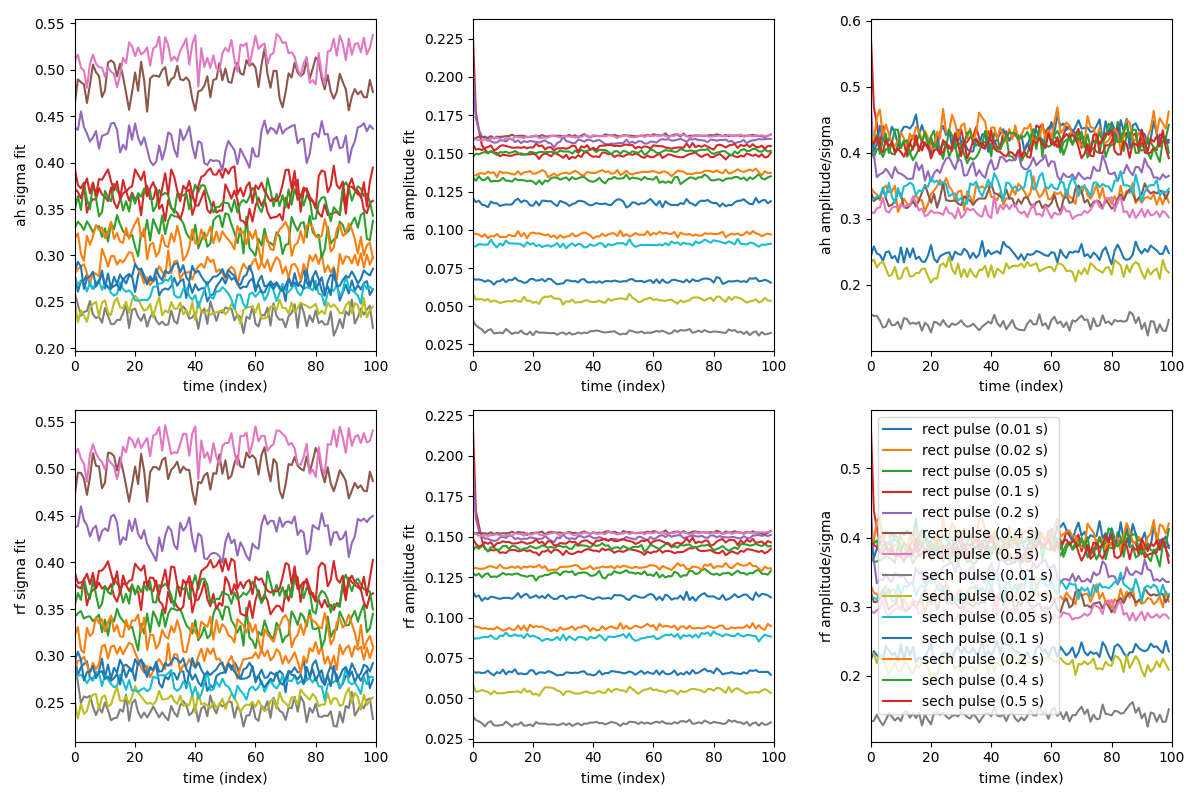

In [392]:
data_all = {
    "rect pulse (0.01 s)" : {
        "range":[35104, 35203],
    },
    "rect pulse (0.02 s)" : {
        "range":[35204, 35303],
    },
    "rect pulse (0.05 s)" : {
        "range":[35004, 35103],
    },
    "rect pulse (0.1 s)" : {
        "range":[32792, 32891],
    },
    "rect pulse (0.2 s)" : {
        "range":[34904, 35003],
    },
    "rect pulse (0.4 s)" : {
        "range":[36004, 36103],
    },
    "rect pulse (0.5 s)" : {
        "range":[35304, 35403],
    },
    "sech pulse (0.01 s)" : {
        "range":[35404, 35503],
    },
    "sech pulse (0.02 s)" : {
        "range":[35504, 35603],
    },
    "sech pulse (0.05 s)" : {
        "range":[35604, 35703],
    },
    "sech pulse (0.1 s)" : {
        "range":[32892, 32991],
    },
    "sech pulse (0.2 s)" : {
        "range":[35704, 35803],
    },
    "sech pulse (0.4 s)" : {
        "range":[35804, 35903],
    },
    "sech pulse (0.5 s)" : {
        "range":[35904, 36003],
    },
}

# fig, axs = plt.subplots(2, 2, figsize = (12, 12))
fig, axs = plt.subplots(2, 3, figsize = (12, 8))

for label, data_dicts in data_all.items():

    data_numbers = range(data_dicts["range"][0], data_dicts["range"][1]+1)
    
    ah_sigmas = []
    rf_sigmas = []
    ah_amplitudes = []
    rf_amplitudes = []
    
    for data_number in data_numbers:
        data, headers = get_experiment_data(data_number)
        (chasm_avg, antihole_avg, rf_avg), (monitor_chasm_avg, monitor_antihole_avg, monitor_rf_avg) = data_groups(data, headers)
        detunings_MHz = headers["detunings"].to("MHz").magnitude
        antihole_to_monitor = antihole_avg/monitor_antihole_avg
        rf_to_monitor = rf_avg/monitor_rf_avg
        
        antihole_fit = get_gaussian_fit(detunings_MHz, antihole_to_monitor / max(antihole_to_monitor))
        rf_fit = get_gaussian_fit(detunings_MHz, rf_to_monitor / max(rf_to_monitor))
        
        ah_sigmas.append(antihole_fit.results["sigma"])
        rf_sigmas.append(rf_fit.results["sigma"])
                         
        ah_amplitudes.append(antihole_fit.results["a"])
        rf_amplitudes.append(rf_fit.results["a"])

    ah_sigmas = np.array(ah_sigmas)
    ah_amplitudes = np.array(ah_amplitudes)
    rf_sigmas = np.array(rf_sigmas)
    rf_amplitudes = np.array(rf_amplitudes)

    data_dicts["ah sigma fit"] = ah_sigmas
    data_dicts["ah amplitude fit"] = ah_amplitudes
    data_dicts["ah amplitude/sigma"] = ah_amplitudes/ah_sigmas
    data_dicts["rf sigma fit"] = rf_sigmas
    data_dicts["rf amplitude fit"] = rf_amplitudes
    data_dicts["rf amplitude/sigma"] = rf_amplitudes/rf_sigmas

    data_dicts["time"] = headers["params"]["antihole"]["duration_no_scan"].magnitude #label.split("(")[1].split(" ms")[0]
    data_dicts["shape"] = label.split(" ")[0]

    axs[0, 0].plot(ah_sigmas, label = label)
    axs[0, 1].plot(ah_amplitudes, label=label)
    axs[0, 2].plot(ah_amplitudes/ah_sigmas, label=label)
    
    axs[1, 0].plot(rf_sigmas, label = label)
    axs[1, 1].plot(rf_amplitudes, label=label)
    axs[1, 2].plot(rf_amplitudes/rf_sigmas, label=label)
    print(label)

axs[0, 0].set_ylabel("ah sigma fit")
axs[1, 0].set_ylabel("rf sigma fit")

axs[0, 1].set_ylabel("ah amplitude fit")
axs[1, 1].set_ylabel("rf amplitude fit")

axs[0, 2].set_ylabel("ah amplitude/sigma")
axs[1, 2].set_ylabel("rf amplitude/sigma")

for i in range(2):
    for j in range(3):
        axs[i, j].set_xlabel("time (index)")
        axs[i, j].set_xlim([0, 100])

plt.tight_layout()
plt.legend()
plt.show()

In [393]:
axs[1, 2].set_ylim(0, 10)

(0.0, 10.0)

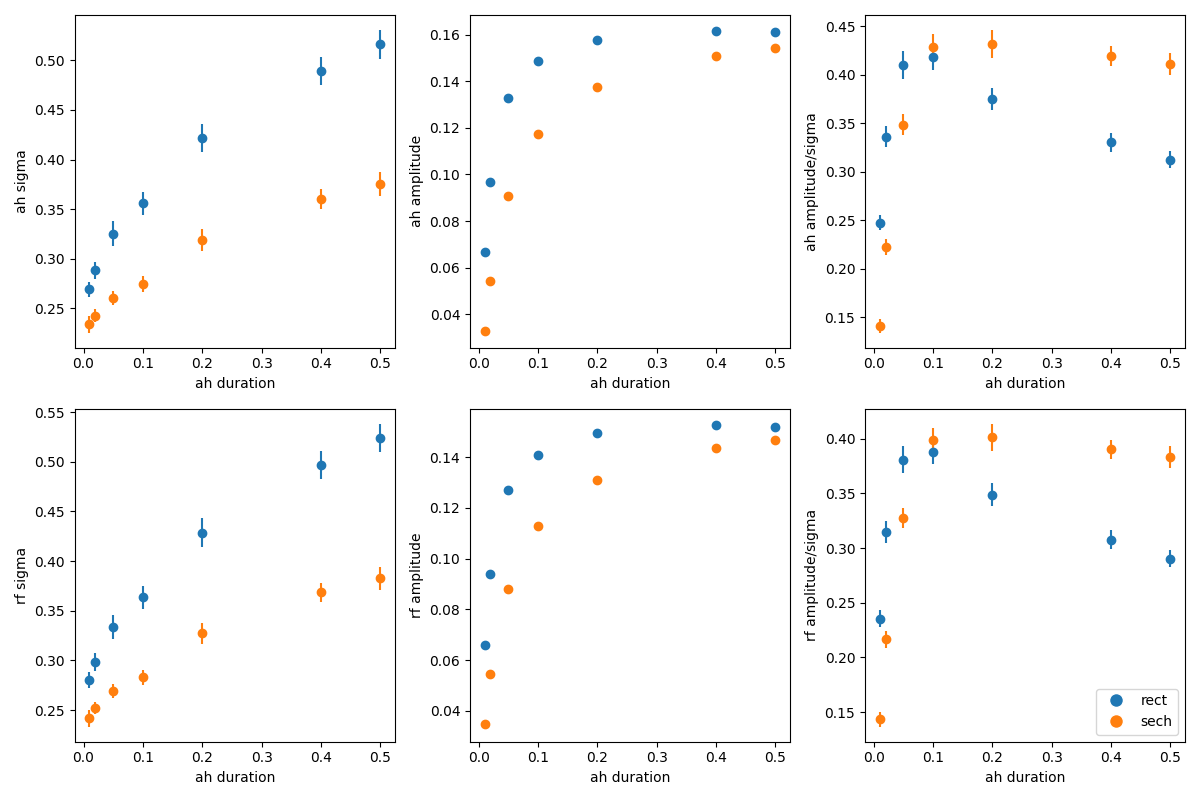

In [372]:
fig, axs = plt.subplots(2, 3, figsize = (12, 8))


N_cut = 10

for label, data_dicts in data_all.items():
    data_dicts["ah amplitude average"] = np.average(data_dicts["ah amplitude fit"][N_cut:]) 
    data_dicts["ah sigma average"] = np.average(data_dicts["ah sigma fit"][N_cut:]) 
    data_dicts["ah amplitude/sigma average"] = np.average(data_dicts["ah amplitude/sigma"][N_cut:]) 
    
    data_dicts["ah amplitude std"] = np.std(data_dicts["ah amplitude fit"][N_cut:]) 
    data_dicts["ah sigma std"] = np.std(data_dicts["ah sigma fit"][N_cut:]) 
    data_dicts["ah amplitude/sigma std"] = np.std(data_dicts["ah amplitude/sigma"][N_cut:]) 
    
    data_dicts["rf amplitude average"] = np.average(data_dicts["rf amplitude fit"][N_cut:]) 
    data_dicts["rf sigma average"] = np.average(data_dicts["rf sigma fit"][N_cut:]) 
    data_dicts["rf amplitude/sigma average"] = np.average(data_dicts["rf amplitude/sigma"][N_cut:]) 
    
    data_dicts["rf amplitude std"] = np.std(data_dicts["rf amplitude fit"][N_cut:]) 
    data_dicts["rf sigma std"] = np.std(data_dicts["rf sigma fit"][N_cut:]) 
    data_dicts["rf amplitude/sigma std"] = np.std(data_dicts["rf amplitude/sigma"][N_cut:]) 

    if (data_dicts["shape"] == "rect"):
        color = "C0"
    elif (data_dicts["shape"] == "sech"):
        color = "C1"

    axs[0, 0].errorbar(data_dicts["time"], data_dicts["ah sigma average"], data_dicts["ah sigma std"], fmt='o', color=color)
    axs[0, 1].errorbar(data_dicts["time"], data_dicts["ah amplitude average"], data_dicts["ah amplitude std"], fmt='o', color=color)
    axs[0, 2].errorbar(data_dicts["time"], data_dicts["ah amplitude/sigma average"], data_dicts["ah amplitude/sigma std"], fmt='o', color=color)
    
    axs[1, 0].errorbar(data_dicts["time"], data_dicts["rf sigma average"], data_dicts["rf sigma std"], fmt='o', color=color)
    axs[1, 1].errorbar(data_dicts["time"], data_dicts["rf amplitude average"], data_dicts["rf amplitude std"], fmt='o', color=color)
    axs[1, 2].errorbar(data_dicts["time"], data_dicts["rf amplitude/sigma average"], data_dicts["rf amplitude/sigma std"], fmt='o', color=color)

axs[0, 0].set_ylabel("ah sigma")
axs[0, 1].set_ylabel("ah amplitude")
axs[0, 2].set_ylabel("ah amplitude/sigma")

axs[1, 0].set_ylabel("rf sigma")
axs[1, 1].set_ylabel("rf amplitude")
axs[1, 2].set_ylabel("rf amplitude/sigma")

legend_elements = [
    Line2D([0], [0], marker='o', color="w", label="rect", markerfacecolor="C0", markersize=10),
    Line2D([0], [0], marker='o', color="w", label="sech", markerfacecolor="C1", markersize=10),
]

for i in range(2):
    for j in range(3):
        axs[i, j].set_xlabel("ah duration")

plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

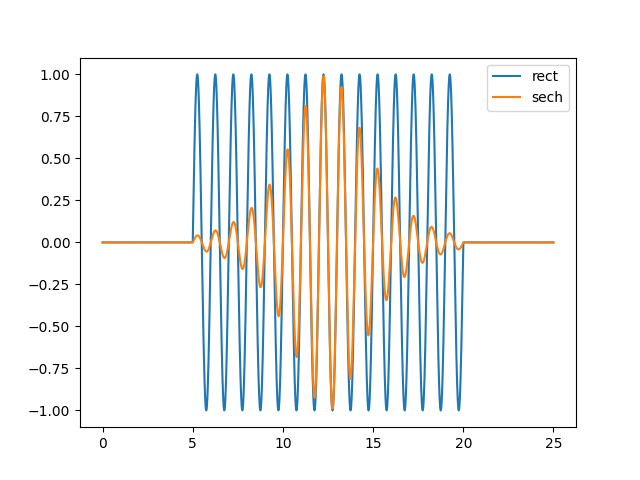

In [388]:
start_frequency = 1
stop_frequency = 1
amplitude = 1
start_time = 5
end_time = 20
phase = 0

def sechEnvelope(times, start_time, end_time):
    return 1/np.cosh((times - (start_time + end_time)/2)/(end_time-start_time)*8)

test_pulse = AWGSineSweep(
    start_frequency,
    stop_frequency,
    amplitude,
    start_time,
    end_time,
    phase
)

xs = np.linspace(0, end_time*1.25, 10000)
ys1 = test_pulse.output(xs)
ys2 = sechEnvelope(xs, start_time, end_time) * ys1

fig, ax = plt.subplots()
ax.plot(xs, ys1, label="rect")
ax.plot(xs, ys2, label="sech")
plt.legend()
plt.show()

In [320]:
print(

0.4 second


<h2>Fourier transforms</h2>

In [360]:
# xs = np.linspace(-5, 5, 1000)
# ys_gaussian = np.exp(-xs**2)

# fig, axs = plt.subplots(1, 2, figsize = (12, 5))
# axs[0].plot(xs, ys_gaussian)
# axs[1].plot(fft(ys_gaussian)[:1000//2])

# plt.show()